# Billboard hits in the year 2000: Exploratory data analysis

The data consists of 317 songs (all in the year 2000) and their evolution in the Billboard charts. For each song the data includes the artist, the length of the song, the genre, the date it entered the charts and the date of the peak in the charts. After this, each song has a timeline of their evolution in the charts. This timeline goes on for 76 weeks, which means that songs that have not been in the charts for 76 weeks has missing data in one of these columns. An interesting next step would be to find out for how many songs this is the case.

In [1]:
import pandas as pd
import numpy as np
billboard_df = pd.read_csv("Datasets/billboard.csv")
billboard_df.head()

year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week     ...      \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0     ...       
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0     ...       
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0     ...       
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0     ...       
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0     ...       

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   x73rd.week  x74th.week  x75th.week  x76th.week  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  

[5 rows x 83 columns]

In [4]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

The info command displays information on all the columns in our dataframe. It is reassuring to see that the count does not give missing values for any of the track-specific information (such as artist, song length or genre) or the week of entrance in the data charts. However, what can also be seen from the data is that the number of columns is larger than it should be. No song in our sample has been in the charts for longer than 65 weeks, which is why we can reduce the number of columns. 

# Data cleaning

In [4]:
billboard_clean = billboard_df.iloc[:,1:72]
billboard_clean.rename(columns = {'artist.inverted':'artist'}, inplace = True)
billboard_clean = billboard_clean.rename(columns=lambda x: x.replace('x', ''))
billboard_clean = billboard_clean.rename(columns=lambda x: x.replace('week', ''))
billboard_clean = billboard_clean.rename(columns=lambda x: x.replace('th.', ''))
billboard_clean = billboard_clean.rename(columns=lambda x: x.replace('rd.', ''))
billboard_clean = billboard_clean.rename(columns=lambda x: x.replace('nd.', ''))
billboard_clean = billboard_clean.rename(columns=lambda x: x.replace('st.', ''))

A new dataframe is created out of the previous dataframe with raw data, where columns with only missing data have been trimmed. To make handling of the data easier, the column titles for the weekly timeline are changed to just the week number in the timeline. Artist.inverted is renamed to just artist, and the first column of the data (the year 2000) has been removed. 

All other missing data is not yet replaced. Observations with missing data should not be removed since it indicates that the song is no longer in the charts at a specific point, and intuitively it would not make sense to replace this data with a string or an integer.

Next up, I use the melt function in pandas to rearrange columns in the dataframe.

In [7]:
## The pandas melt function transforms the dataframe to a dataframe where every row indicates a weekly position in the chart, which means a song can have multiple entries.
billboard= pd.melt(billboard_clean, id_vars =("track","artist", "genre", "time", "date.entered", "date.peaked"),var_name= "Week", value_name="Ranking")
billboard['Week'].dtypes
billboard['Week']=billboard['Week'].astype(int)


billboard= billboard.dropna()
billboard['Ranking']=billboard['Ranking'].astype(int)
billboard["New_time"]='0:'+ billboard["time"]
billboard['timedelta'] = pd.to_timedelta(billboard["New_time"])
billboard['entered_to_datetime'] = pd.to_datetime(billboard['date.entered'])
billboard['peaked_to_datetime'] = pd.to_datetime(billboard['date.peaked'])

In [5]:
billboard.to_csv("billboard_clean.csv", sep=';')

I export this transformed dataset as a csv-file, so that visualizations can be done using Tableau.

# Data visualization

### For visualizations in Tableau, a new variable (weighted_ranking) was created, defined as:
##### weighted_ranking = 100 - Ranking

This assigns more weight to tracks that have been higher in the chart, and is thus a better proxy for popularity. This means that a track that is number 1 in the charts has a weighted ranking of (100-1) = 99 for that week, while a song that is number 60 in the charts has a weighted ranking of (100-60) = 40 in the rankings. This may be a relatively high weight for a song that is not very popular, but it avoids that our data is too skewed.

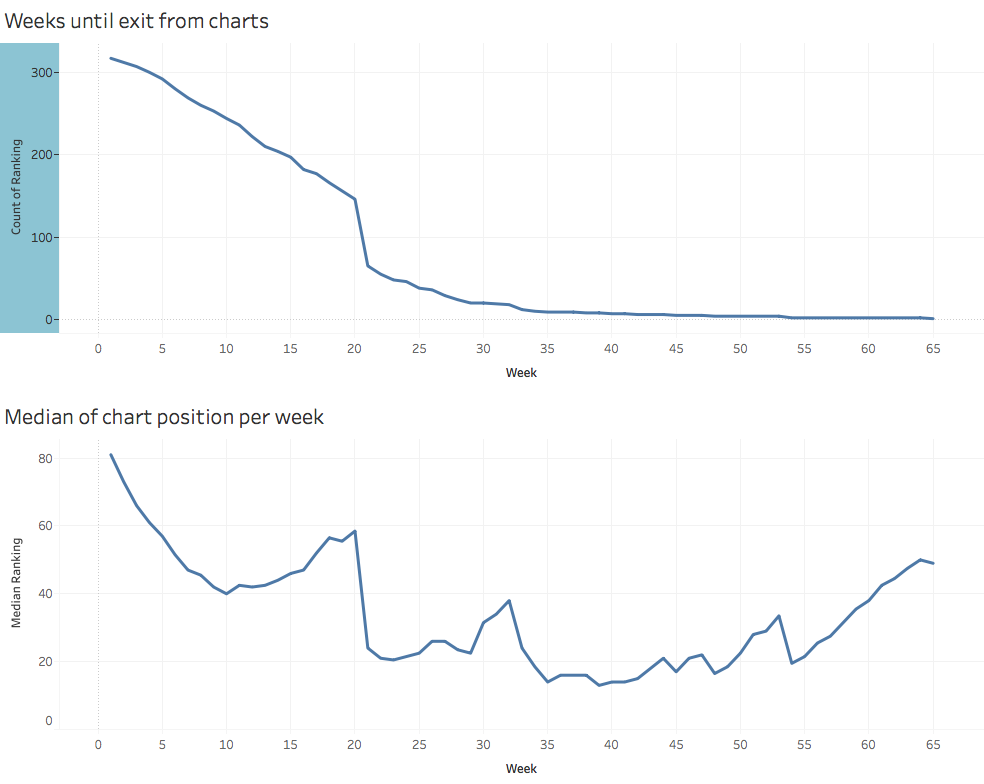

In [1]:
from IPython.core.display import Image 
Image(filename='Tableau/Overall evolution of charts.png')

The visualizations above display an interesting story about the evolution of track popularity in the billboard charts in the year 2000. The top chart displays how long it takes for each song to leave the charts. The maximum number of weeks a song was in the charts, was 65 weeks. It is also interesting to see that there is a sharp decline in the amount of songs that are in the charts for longer than 20 weeks. 

The evolution of the median position in the charts shows a less clear trend. However, the initial downward slope suggests that songs generally take some time to reach their top position. After 10 weeks, the average position of songs that are still in the charts goes up. After 20 weeks there is a sharp drop in the median position of songs that are still in the charts. This is related to the findings in the previous graph, which suggests some sort of artificial cutoff after 20 weeks.

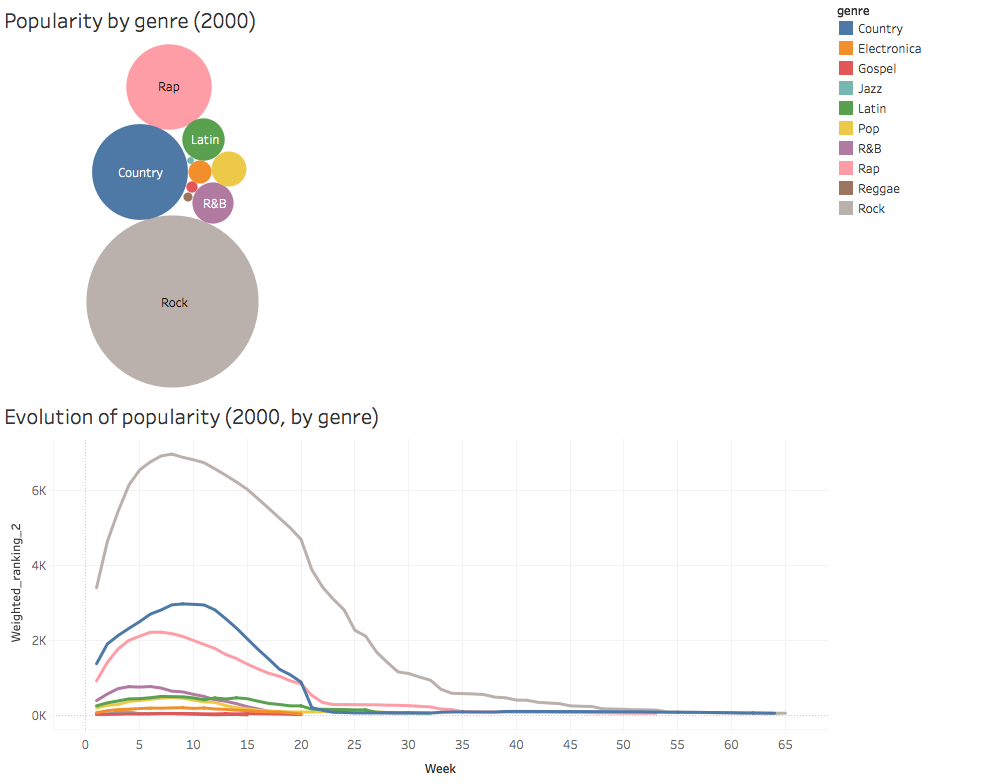

In [2]:
Image(filename="Tableau/Genres.png")

As can be seen from the visualizations above, Rock was the most popular genre in the billboard charts in the year 2000. Rock songs in general stayed popular for a longer time as well. What is also interesting is that Rap songs (marked in pink) stay popular for a longer time than country songs.

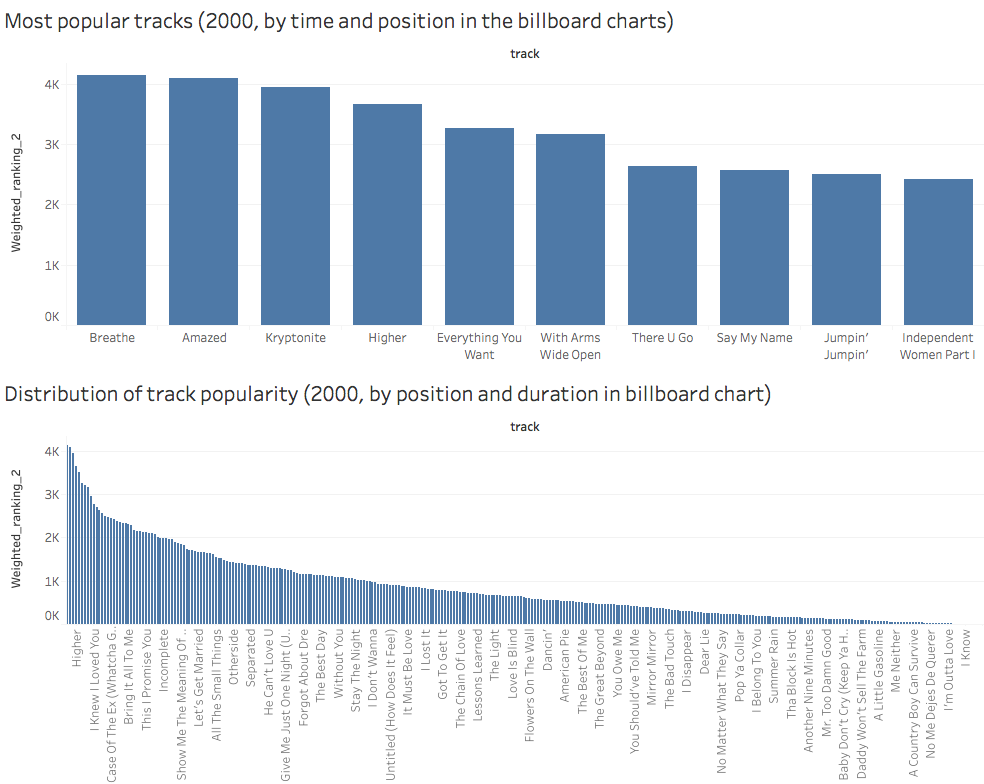

In [3]:
Image(filename="Tableau/Track popularity.png")

The graphs above may make you feel nostalgic: the top graph displays the most popular songs of 2000 according to my metric (where songs that are in the chart for a longer time get a relatively high score). Breathe from Faith Hill comes out on top, followed by Amazed by Lonestar and Kryptonite by 3 doors down. The distribution of track popularity seems skewed, but is skewed less than when taking a different metric for popularity. The top track achieves a weighted ranking of over 4000, which is the equivalent of more than 40 weeks at number one in the chart (but which is likely achieved by being in the charts for a long time period).

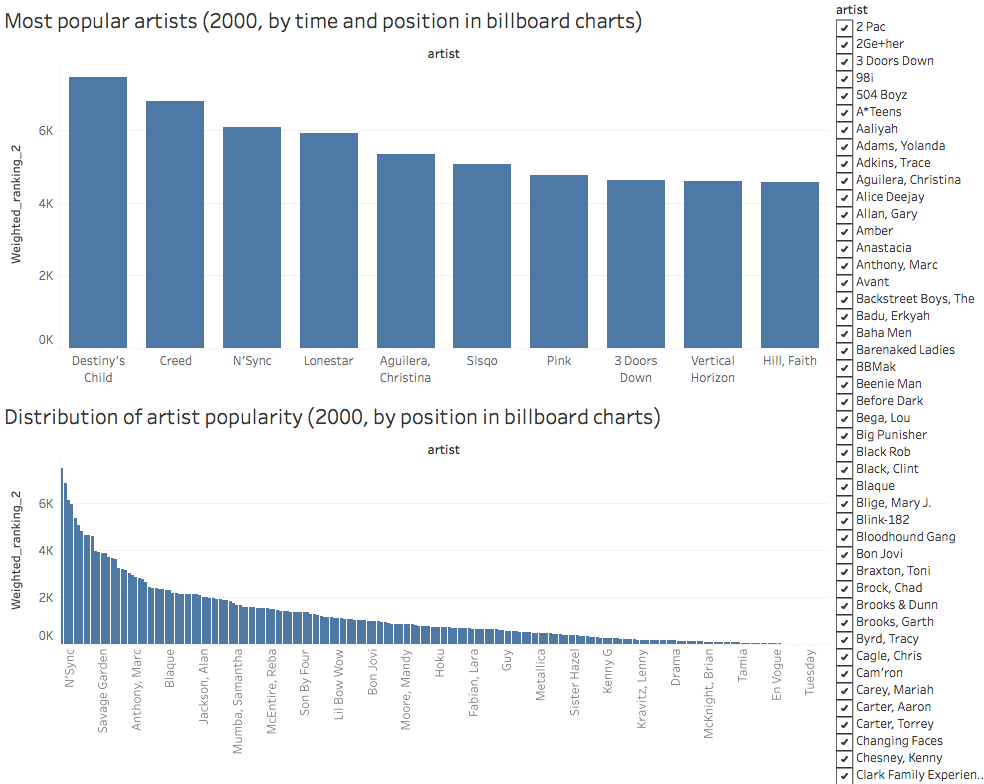

In [4]:
Image(filename="Tableau/Artist popularity.png")

## Conclusion

It's interesting to see how easy visualizations in Tableau can be, and how fast you can get an overview of the data. Some interesting findings where to see that Rock was the most popular genre, and that Rap stayed popular over a longer period of time on average in 2000. Tableau is a nice tool to add to my toolkit for quick and dirty exploratory data analysis in the future, but the downside of Tableau seems to be that it is not always customizable (for example, rotating the label on the y-axis seemed to be impossible). 